In [1]:
# !pip install tensorflow matplotlib 
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 784) / 255.0, x_test.reshape(-1, 784) / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)

In [3]:
# Build the model with regularization and dropout 
model = Sequential([
    
    Dense(128, activation='relu', input_shape=(784,), 
          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
Dropout(0.5),
Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)), Dropout(0.5),
Dense(10, activation='softmax')
])

In [4]:
# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), verbose=2)

Epoch 1/20
1875/1875 - 6s - loss: 0.7797 - accuracy: 0.8179 - val_loss: 0.3796 - val_accuracy: 0.9360 - 6s/epoch - 3ms/step
Epoch 2/20
1875/1875 - 4s - loss: 0.5063 - accuracy: 0.9024 - val_loss: 0.3301 - val_accuracy: 0.9459 - 4s/epoch - 2ms/step
Epoch 3/20
1875/1875 - 4s - loss: 0.4616 - accuracy: 0.9121 - val_loss: 0.2968 - val_accuracy: 0.9563 - 4s/epoch - 2ms/step
Epoch 4/20
1875/1875 - 4s - loss: 0.4436 - accuracy: 0.9151 - val_loss: 0.2818 - val_accuracy: 0.9582 - 4s/epoch - 2ms/step
Epoch 5/20
1875/1875 - 4s - loss: 0.4245 - accuracy: 0.9202 - val_loss: 0.2780 - val_accuracy: 0.9587 - 4s/epoch - 2ms/step
Epoch 6/20
1875/1875 - 4s - loss: 0.4207 - accuracy: 0.9222 - val_loss: 0.2713 - val_accuracy: 0.9604 - 4s/epoch - 2ms/step
Epoch 7/20
1875/1875 - 5s - loss: 0.4134 - accuracy: 0.9227 - val_loss: 0.2718 - val_accuracy: 0.9623 - 5s/epoch - 2ms/step
Epoch 8/20
1875/1875 - 4s - loss: 0.4118 - accuracy: 0.9235 - val_loss: 0.2728 - val_accuracy: 0.9587 - 4s/epoch - 2ms/step
Epoch 9/

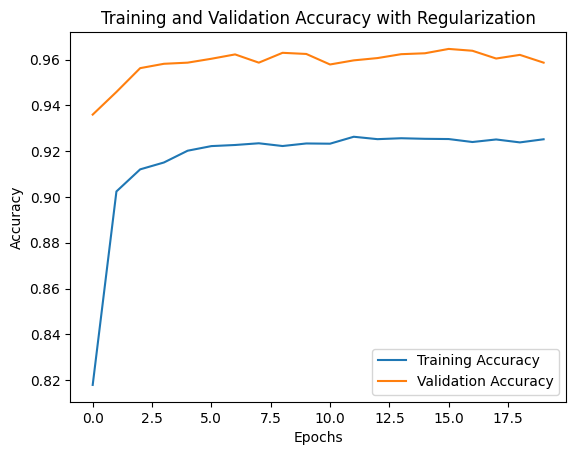

In [5]:
# Plot training and validation accuracy 
plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.title('Training and Validation Accuracy with Regularization') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()